В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
medical_df = pd.read_csv("drive/MyDrive/ML Course/medical-charges.csv")
non_smoker_df = medical_df[medical_df.smoker == 'no'].copy()

In [8]:
X_original = non_smoker_df['age'].values
y_original = non_smoker_df['charges'].values

##Метод МНК

In [9]:
n_mnk = len(non_smoker_df)
m_mnk = (n_mnk * np.sum(X_original * y_original) - np.sum(X_original) * np.sum(y_original)) / (n_mnk * np.sum(X_original**2) - (np.sum(X_original))**2)
b_mnk = (np.sum(y_original) - m_mnk * np.sum(X_original)) / n_mnk
predictions_mnk = m_mnk * X_original + b_mnk
rmse_mnk = np.sqrt(np.mean((y_original - predictions_mnk)**2))

print(f"МНК: m={m_mnk:.4f}, b={b_mnk:.4f}, RMSE={rmse_mnk:.4f}")

МНК: m=267.2489, b=-2091.4206, RMSE=4662.5058


###Знайдіть і виведіть коефіцієнти моделі

In [10]:
#x = non_smoker_df['age'].values
#y = non_smoker_df['charges'].values
n = len(non_smoker_df)

In [11]:
m = (n * np.sum(X_original * y_original) - np.sum(X_original) * np.sum(y_original)) / (n * np.sum(X_original**2) - (np.sum(X_original))**2)
b = (np.sum(y_original) - m * np.sum(X_original)) / n

In [12]:
print(f"Коефіцієнт нахилу (m): {m:.4f}")
print(f"Коефіцієнт перетину (b): {b:.4f}")

Коефіцієнт нахилу (m): 267.2489
Коефіцієнт перетину (b): -2091.4206


###Обчисліть прогнози моделі і збережіть в окрему змінну

In [13]:
predictions_mnk = m * X_original + b

In [14]:
non_smoker_df['predicted_charges'] = m * non_smoker_df['age'] + b

In [15]:
non_smoker_df[['age', 'charges', 'predicted_charges']].head()

,age,charges,predicted_charges
1,18,1725.55230,2719.059874
2,28,4449.46200,5391.549003
3,33,21984.47061,6727.793567
4,32,3866.85520,6460.544654
5,31,3756.62160,6193.295741


###Порахуйте точність прогнозу RMSE

In [17]:
rmse_mnk = np.sqrt(np.mean((non_smoker_df['charges'] - non_smoker_df['predicted_charges'])**2))

print(f"\nRMSE: {rmse_mnk:.4f}")


RMSE: 4662.5058


##Full-Batch градієнтного спуску

In [40]:
def gradient_descent(X, y, learning_rate, n_iterations):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    y = y.reshape(-1, 1)
    cost_history = []

    for iteration in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1/m) * X.T.dot(errors)
        theta = theta - learning_rate * gradients
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)
    return theta, cost_history

In [41]:
X_mean_gd = np.mean(X_original)
X_std_gd = np.std(X_original)

# нормалізуємо дані для градієнтного спуску
X_normalized_gd = (X_original - X_mean_gd) / X_std_gd

# Додаємо стовпець одиниць для b (перетину)
X_b_gd = np.c_[np.ones(len(X_normalized_gd)), X_normalized_gd]

In [42]:
learning_rates = [0.001, 0.01, 0.05]
n_iterations = 3000

In [43]:
results = {}

for lr in learning_rates:
    print(f"\nТестуємо learning rate: {lr}")
    theta, cost_history = gradient_descent(X_b_gd, y_original, lr, n_iterations)
    results[lr] = {'theta': theta, 'cost_history': cost_history}
    print(f"Отримані коефіцієнти для LR={lr}:")
    m_original = theta[1][0] / X_std_gd
    b_original = theta[0][0] - theta[1][0] * X_mean_gd / X_std_gd

    print(f"Коефіцієнт нахилу (m): {m_original:.4f}")
    print(f"Коефіцієнт перетину (b): {b_original:.4f}")


Тестуємо learning rate: 0.001
Отримані коефіцієнти для LR=0.001:
Коефіцієнт нахилу (m): 253.9651
Коефіцієнт перетину (b): -1987.5396

Тестуємо learning rate: 0.01
Отримані коефіцієнти для LR=0.01:
Коефіцієнт нахилу (m): 267.2489
Коефіцієнт перетину (b): -2091.4206

Тестуємо learning rate: 0.05
Отримані коефіцієнти для LR=0.05:
Коефіцієнт нахилу (m): 267.2489
Коефіцієнт перетину (b): -2091.4206


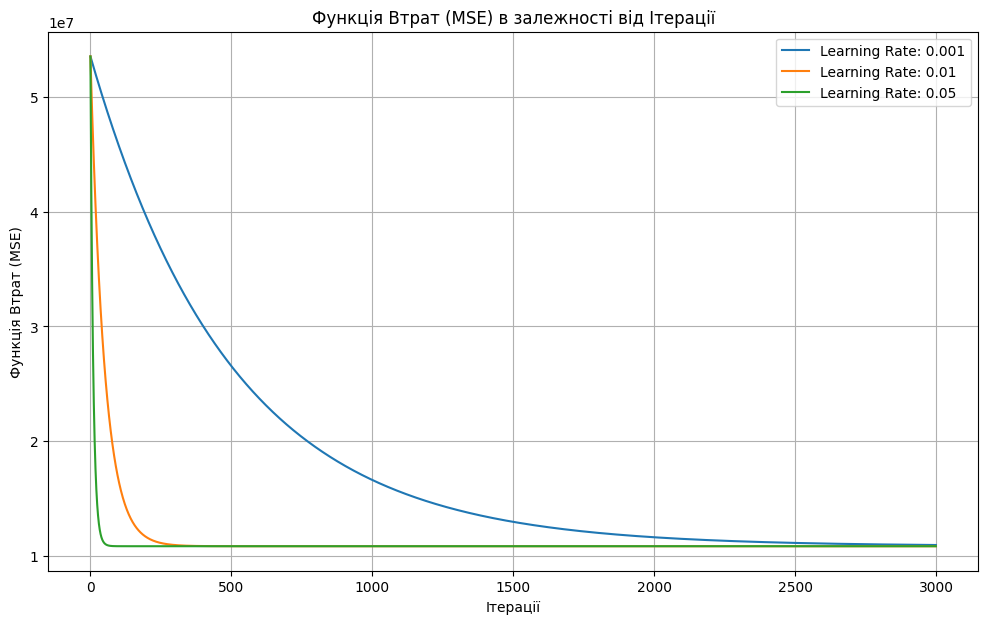

In [45]:
plt.figure(figsize=(12, 7))
for lr, data in results.items():
    plt.plot(range(n_iterations), data['cost_history'], label=f'Learning Rate: {lr}')

plt.title('Функція Втрат (MSE) в залежності від Ітерації')
plt.xlabel('Ітерації')
plt.ylabel('Функція Втрат (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
best_lr = None
min_final_cost = float('inf')

for lr, data in results.items():
    final_cost = data['cost_history'][-1]
    if final_cost < min_final_cost:
        min_final_cost = final_cost
        best_lr = lr

print(f"\nНайкращий Learning Rate виходячи з найменшої фінальної помилки: {best_lr}")
best_theta = results[best_lr]['theta']

non_smoker_df['predicted_charges_gd'] = X_b_gd.dot(best_theta)

predictions_gd = non_smoker_df['predicted_charges_gd']

rmse_gd = np.sqrt(np.mean((y_original - predictions_gd)**2))

print(f"RMSE для найкращої моделі (LR={best_lr}): {rmse_gd:.4f}")



Найкращий Learning Rate виходячи з найменшої фінальної помилки: 0.01
RMSE для найкращої моделі (LR=0.01): 4662.5058


## Використання `scikit-learn.LinearRegression`

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [50]:
X_sk = non_smoker_df['age'].to_frame()
y_sk = non_smoker_df['charges']

In [51]:
model = LinearRegression()
model.fit(X_sk, y_sk)

LinearRegression()

In [52]:
m_sk = model.coef_[0]
b_sk = model.intercept_

print(f"\nКоефіцієнт нахилу (m) (scikit-learn): {m_sk:.4f}")
print(f"Коефіцієнт перетину (b) (scikit-learn): {b_sk:.4f}")


Коефіцієнт нахилу (m) (scikit-learn): 267.2489
Коефіцієнт перетину (b) (scikit-learn): -2091.4206


In [53]:
non_smoker_df['predicted_charges_sk'] = model.predict(X_sk)

In [54]:
non_smoker_df[['age', 'charges', 'predicted_charges_sk']].head()

,age,charges,predicted_charges_sk
1,18,1725.55230,2719.059874
2,28,4449.46200,5391.549003
3,33,21984.47061,6727.793567
4,32,3866.85520,6460.544654
5,31,3756.62160,6193.295741


In [62]:
predictions_sk = model.predict(X_sk)

In [61]:
rmse_sk = np.sqrt(mean_squared_error(y_original, predictions_sk))

print(f"\nRMSE (Root Mean Squared Error) (scikit-learn): {rmse_sk:.4f}")


RMSE (Root Mean Squared Error) (scikit-learn): 4662.5058


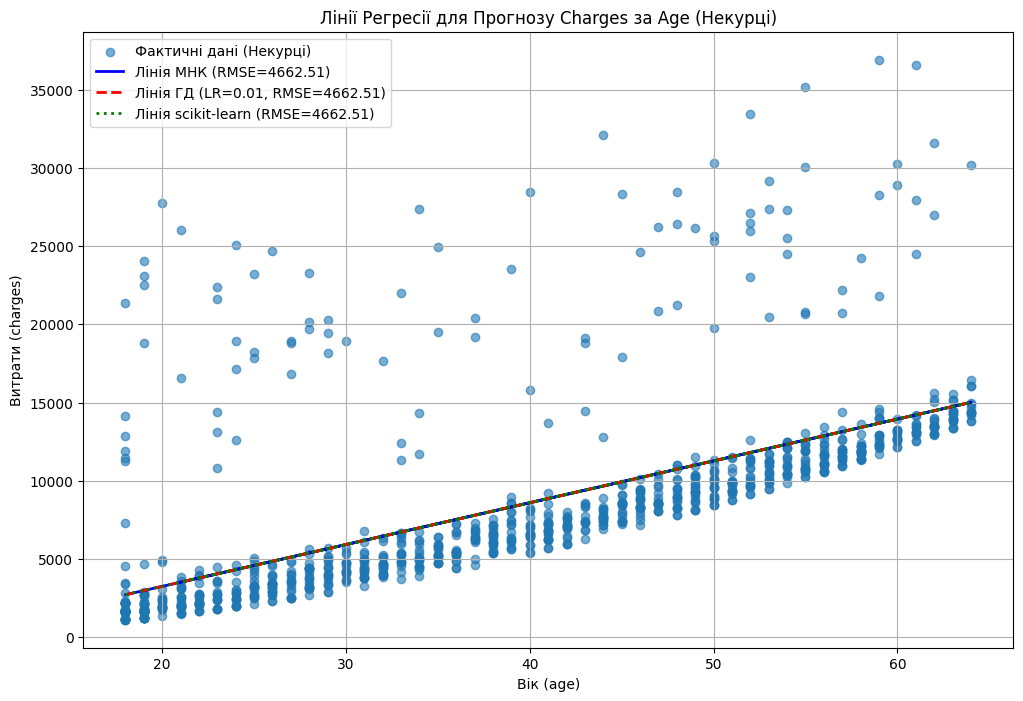

In [65]:
plt.figure(figsize=(12, 8))

# Діаграма розсіювання (вихідні дані)
plt.scatter(non_smoker_df['age'], non_smoker_df['charges'], alpha=0.6, label='Фактичні дані (Некурці)')

# Лінія регресії МНК
plt.plot(X_original, predictions_mnk, color='blue', linestyle='-', linewidth=2, label=f'Лінія МНК (RMSE={rmse_mnk:.2f})')

# Лінія регресії Градієнтного Спуску
plt.plot(X_original, predictions_gd, color='red', linestyle='--', linewidth=2, label=f'Лінія ГД (LR={best_lr}, RMSE={rmse_gd:.2f})')

# Лінія регресії scikit-learn
plt.plot(X_original, predictions_sk, color='green', linestyle=':', linewidth=2, label=f'Лінія scikit-learn (RMSE={rmse_sk:.2f})')

plt.title('Лінії Регресії для Прогнозу Charges за Age (Некурці)')
plt.xlabel('Вік (age)')
plt.ylabel('Витрати (charges)')
plt.legend()
plt.grid(True)
plt.show()

**Висновок**

Всі три лінії регресії практично ідеально накладаються одна на одну. Невеликі відмінності можуть бути через чисельну точність або, у випадку градієнтного спуску, через кількість ітерацій та швидкість навчання.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [66]:
smoker_df = medical_df[medical_df.smoker == 'yes'].copy()

In [67]:
X_smoker = smoker_df['age'].to_frame()
y_smoker = smoker_df['charges']

In [68]:
model_smoker = LinearRegression()
model_smoker.fit(X_smoker, y_smoker)

LinearRegression()

In [69]:
smoker_df['predicted_charges'] = model_smoker.predict(X_smoker)

In [70]:
rmse_smoker = np.sqrt(mean_squared_error(y_smoker, smoker_df['predicted_charges']))

print(f"RMSE: {rmse_smoker:.4f}")

RMSE: 10711.0033


In [71]:
m_smoker = model_smoker.coef_[0]
b_smoker = model_smoker.intercept_


print(f"Коефіцієнт нахилу (m): {m_smoker:.4f}")
print(f"Коефіцієнт перетину (b): {b_smoker:.4f}")

Коефіцієнт нахилу (m): 305.2376
Коефіцієнт перетину (b): 20294.1281


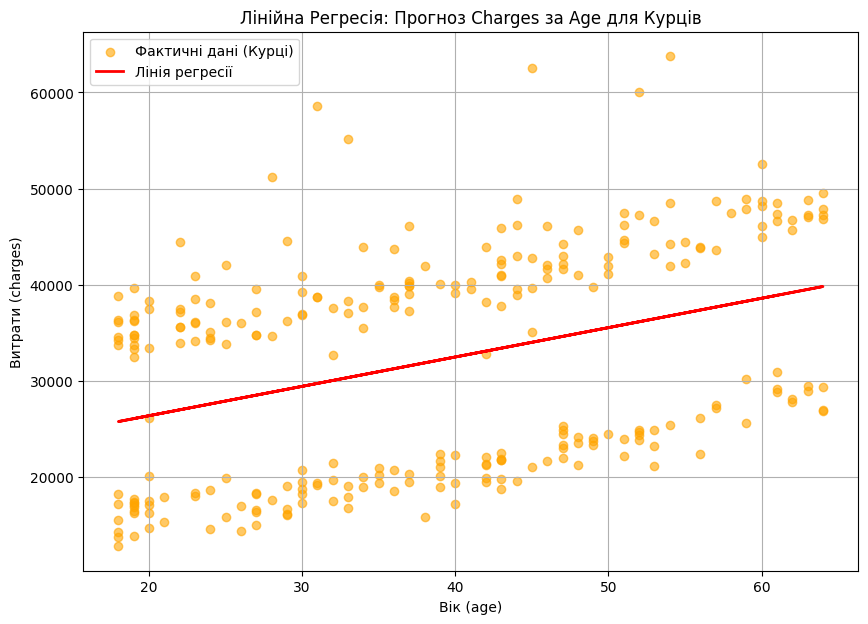

In [72]:
plt.figure(figsize=(10, 7))
plt.scatter(smoker_df['age'], smoker_df['charges'], alpha=0.6, label='Фактичні дані (Курці)', color='orange')
plt.plot(smoker_df['age'], smoker_df['predicted_charges'], color='red', linewidth=2, label='Лінія регресії')

plt.title('Лінійна Регресія: Прогноз Charges за Age для Курців')
plt.xlabel('Вік (age)')
plt.ylabel('Витрати (charges)')
plt.legend()
plt.grid(True)
plt.show()

**Висновки**

Прогнозування вартості медичних зборів для курців, відшковхуючись тільки на їх вік, одразу здається ідеєю поганою. Вишепроведений аналіз тільки підкрепив цю думку.

Модель майже не пояснює варіацію в в медичних зборах для курців. Ми можемо побачити доволі високу похибку прогнозу - RMSE на рівні 10711 вказує на те, що прогнози будуть дуже неточними і ненадійними для прийняття рішень.

Така модель не надасть компанії корисних прогнозів для планування, оцінки ризиків або персоналізації страхових планів.

Для покращення цієї можелі необхідно включити більше ознак, які, ймовірно, мають сильніший вплив, ніж просто вік клієнта (наприклад `bmi`). Куріння само пособі вже є значним фактором ризику, тому його вплив скоріш за все є комплексним, тому обовʼязково треба звертати увагу на повну картину.